# Exercise 1

***

- Use numpy and matplotlib to plot the absolute value function.

- Research and explain why the absolute value function is not typically used in fitting straight lines to data.
***

## Imports

In [1]:
# Efficient numerical arrays.
import numpy as np

# Import matplotlib.
import matplotlib.pyplot as plt

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

First we need to create a set of numbers w (weights in this case) from 0 to 20 using `np.arange`. We'll then use `numpy.random.normal` to create random points on the y-axis to represent distance. 

In [2]:
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

Let's see how this looks on a plot.

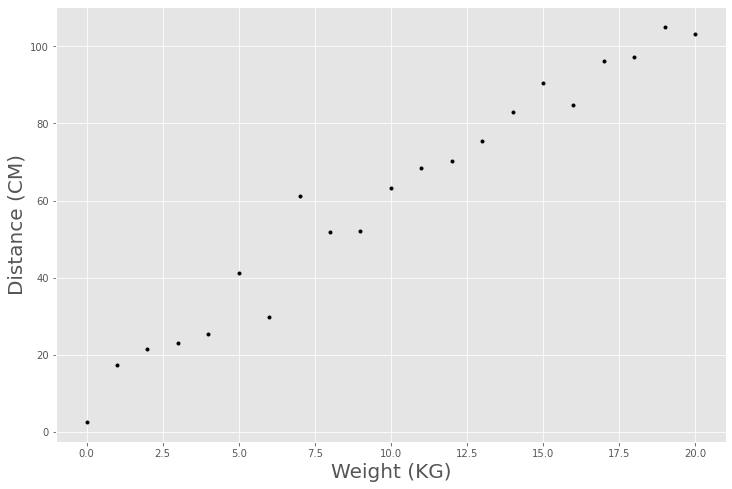

In [3]:
# Create the plot.

plt.plot(w, d, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)', fontsize=20)
plt.ylabel('Distance (CM)', fontsize=20);

To fit a straight line to the data, we just must pick values for *m* and *c*. <br>
For the green line *m* is 5 and *c* is 10. <br>
For the green line *m* is 6 and *c* is 5. <br>
For the green line *m* is 10 and *c* is 15. <br>

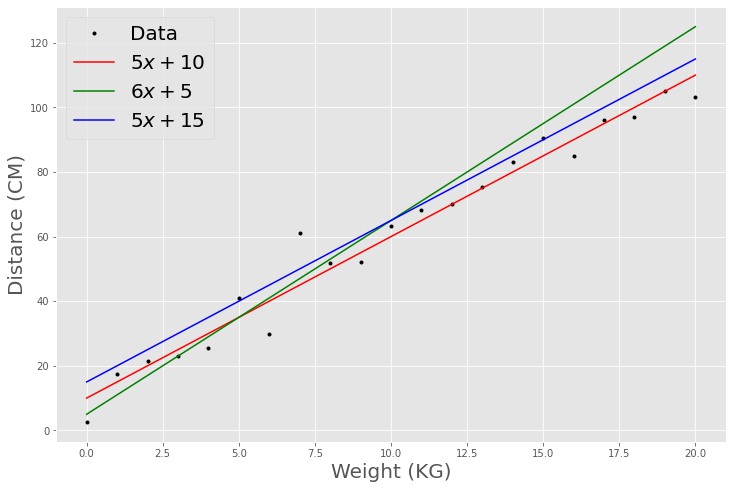

In [4]:
# Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")

# Add a legend.
plt.legend(fontsize=20)

# Add axis labels.
plt.xlabel('Weight (KG)', fontsize=20)
plt.ylabel('Distance (CM)', fontsize=20);

To calculate the absolute value insread of using *least square fitting*, we can use the code below which uses `numpy.absolute`. [01]

In [5]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([np.absolute(d[i] - m * w[i] - c) for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  5.00 and c = 10.00:    86.69
Cost with m =  6.00 and c =  5.00:   164.41
Cost with m =  5.00 and c = 15.00:   127.24


### Using Least Square Method

We now need to calculate the best values for *m* and *c*. The theory of this was discussed in the lecture. [02]

In [6]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.963106 and c is 10.526724.


In [7]:
np.polyfit(w, d, 1)

array([ 4.96310613, 10.52672408])

### Best fit line

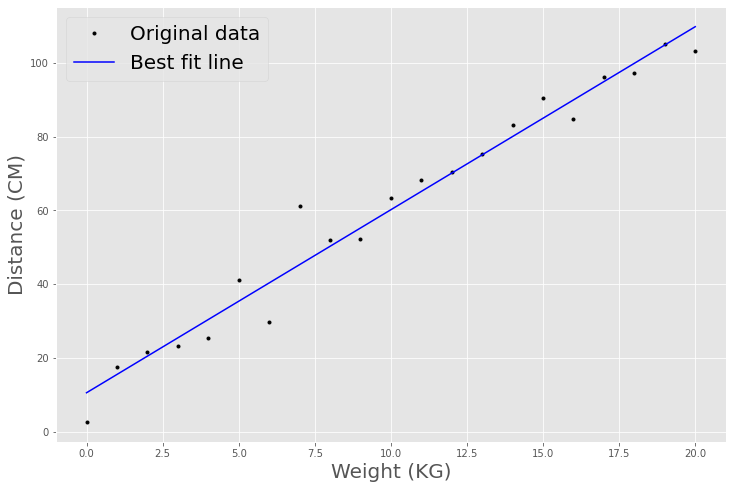

In [8]:
# Plot the best fit line.
plt.plot(w, d, 'k.', label='Original data')
plt.plot(w, m * w + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Weight (KG)', fontsize=20)
plt.ylabel('Distance (CM)', fontsize=20)
plt.legend(fontsize=20);

### Using Absolute Value Method

In reality, 'least absolute value methods' of regression is sometimes used instead of 'least squares', but there are a few reasons why least squares is more popular. [03]
1.  In calculus, when trying to solve an optimization problem (which is what regression is, minimizing error) we must take the derivative to find the points where it is equal to 0. When differentiating, absolute value signs are create a piecewise function whereas squares are far simpler to differentiate, especially due to their non-linearity. [03]
2. Least squares regression lines are more efficient (they don't require as great of a number of samples to get a good estimate of the true regression line for the population). [03]

Least squares is more common but only becuase it ended up that way. There are many good arguments as to why in many scenarios least absolute values are better, including the fact that least squares regression is far more sensitive to outliers. [03]

![popup1](../img/popup_1.png)

![popup2](../img/popup_2.png)

![popup3](../img/popup_3.png)

The above compares the least-squares fit method and the least absolute deviations fit method. A straight line is fitted to a set of data points. In the case of the least-squares fit, the straight line is obtained by minimizing the sum of the squares of the residuals, which are the deviations of the data points from the line. In the case of the least absolute deviations fit, the straight line is obtained by minimizing the sum of the absolute values of the residuals. The least absolute deviations fit is a robust fit method, unlike the least-squares fit. [04] <br>
The least absolute deviations fit is a robust fit method. That means the least absolute deviations fit is insensitive to outlying data points. The robustness of the least absolute deviations fit is shown in Snapshot 1, where the top-left point is an outlier. [04]

A function is not differentiable at a point if it is not continuous at that point. As an example, let's take the following derivative:

$$\frac{df}{dx}(a)=\lim_{x \to a}\frac{f(x)-f(a)}{x-a}$$

Looking at the difference quotient, the denominator approaches 0 as x approaches a, so in order for this limit to exist,
the numerator must also go to 0 as x approaches a, so that we are not dividing by zero. That is:

$$\lim_{x \to a}f(x)-f(a)=0$$

Moving the constant term f(a) to the right hand side of the equation, we get:

$$\lim_{x \to a}f(x)=f(a)$$

Therefore,  f(x) is continuous at x = a. This means that if the derivative of f(x) exists at x = a, f(x) must be continuous at x = a as well. Following on from this, we can also say that if f(x) is discontinuous at x = a, it is also non-differentiable at x = a.

The graph of the absolute value function looks like the line y = x for positive x and y = −x for negative
x, a V-Shape as shown below:

In [9]:
# Generate array of x-values from -20 to 20.
x = np.arange(-20, 21, 1)

# Get absolute of x array for y-values.
y = np.abs(x)

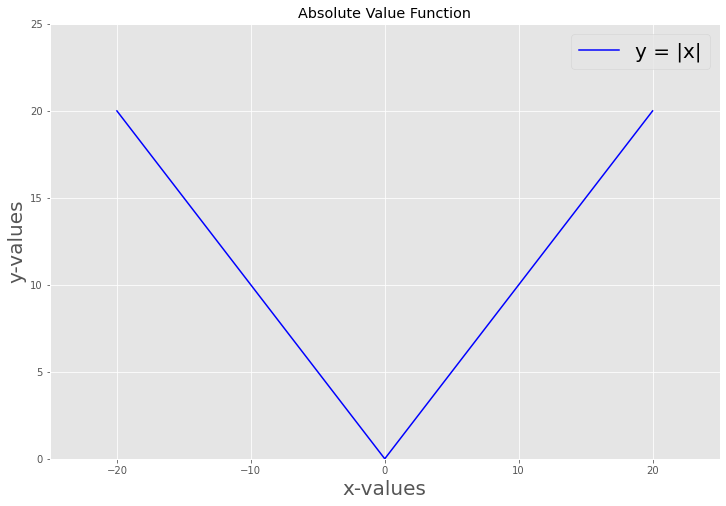

In [10]:
# plot x vals and corresponding y vals
plt.plot(x, y, label = "y = |x|", color='b')
plt.title("Absolute Value Function")
plt.xlabel("x-values", fontsize=20)
plt.ylabel("y-values", fontsize=20)
plt.xlim([-25, 25])
plt.ylim([0, 25])
plt.legend(fontsize=20);

Both of these functions have a y-intercept of 0, and since the function is defined to be 0 at x = 0, the
absolute value function is continuous. But having said that, the function f(x) = |x| is not differentiable at x = 0.
Let's look at the example of the limit definition of the derivative at x = 0 of the absolute value function:

$$\frac{df}{dx}(0)=\lim_{x \to 0}\frac{f(x)-f(0)}{x-0}=\lim_{x \to 0}\frac{\lvert x \rvert - \lvert 0 \rvert }{x-0}=\lim_{x \to 0}\frac{\lvert x \rvert}{x}$$

If this limit exists, then the left limit must equal the right limit. The left limit is given by:

$$\lim_{x \to 0^-}\frac{\lvert x \rvert}{x}=\lim_{x \to 0^-}\frac{-x}{x}=-1$$

while the right limit is given by:

$$\lim_{x \to 0^+}\frac{\lvert x \rvert}{x}=\lim_{x \to 0^+}\frac{x}{x}=1$$

The left limit does not equal the right limit, and therefore the limit of the difference quotient of f(x) = |x|
at x = 0 does not exist (as Cady Heron says in the film Mean Girls). Thus the absolute value function is not differentiable at x = 0. [05]

# Exercise 2

***

- Fit a straight line to the following data points, using all three methods used in the 02-models.ipynb notebook.

- Do you think a straight line is a good model for these points?
***

In [11]:
# Optimization.
import scipy.optimize as so

In [12]:
x_raw = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y_raw = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]
x = np.asarray(x_raw)
y = np.asarray(y_raw)

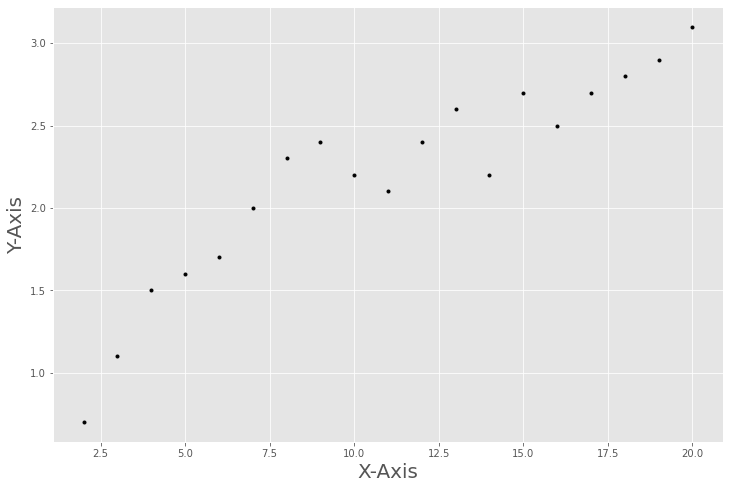

In [13]:
plt.plot(x, y, 'k.')

# Set some properties for the plot.
plt.xlabel('X-Axis', fontsize=20)
plt.ylabel('Y-Axis', fontsize=20);

In [14]:
np.polyfit(x, y, 1)

array([0.10315789, 1.04947368])

In [15]:
m_a, c_a = np.polyfit(x, y, 1)
m_a, c_a

(0.10315789473684209, 1.0494736842105261)

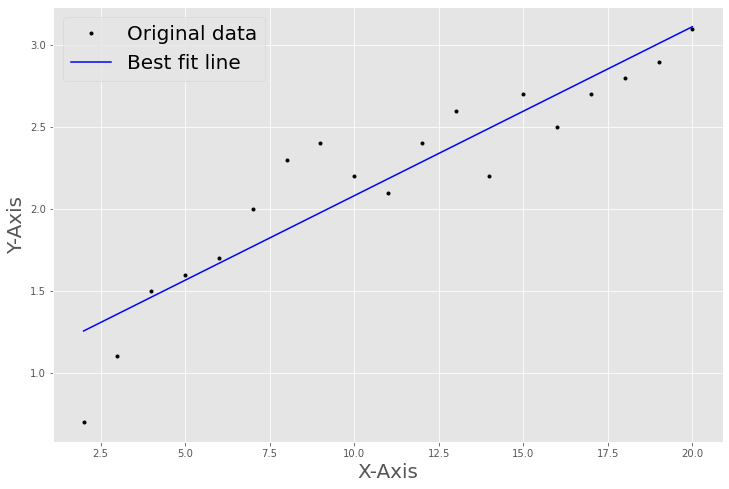

In [16]:
# Plot the best fit line.
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m_a * x + c_a, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('X-Axis', fontsize=20)
plt.ylabel('Y-Axis', fontsize=20)
plt.legend(fontsize=20);

### scipy.optimize.minimize

In [17]:
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

In [18]:
# Run a quick test.
cost((0.1, 1.0))

1.1799999999999997

In [19]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (2.0, 2.0))
# Show the results.
result

      fun: 1.03957894736911
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([1.49011612e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [20]:
# Extract the optimized m and c.
m_o, c_o = result.x
# Print them.
m_o, c_o

(0.10315785999003411, 1.0494740589312146)

In [21]:
# Compare with analytical m and c
m_a, c_a

(0.10315789473684209, 1.0494736842105261)

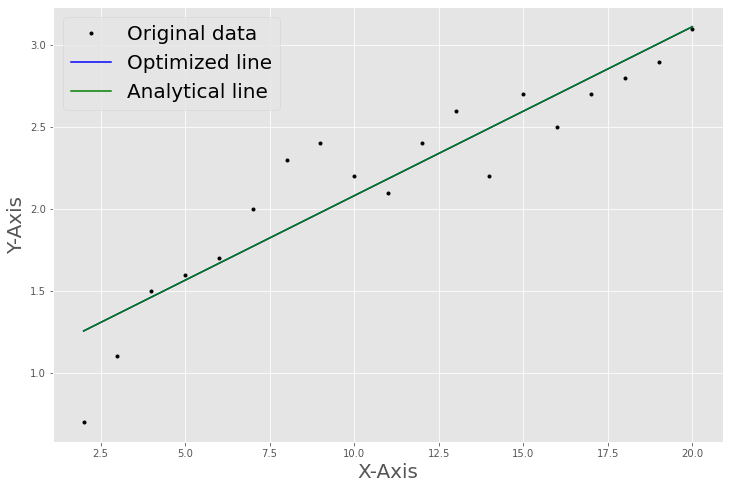

In [22]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots()
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
plt.xlabel('X-Axis', fontsize=20)
plt.ylabel('Y-Axis', fontsize=20)
ax.legend(fontsize=20);

### scipy.optimize.curve_fit

In [23]:
# Create the model function.
def f(x, m, c):
    return m * x + c

In [24]:
# Run curve_fit.
result = so.curve_fit(f, x, y)
result

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [25]:
# Pull out the parameters.
m_f, c_f = result[0]
# Print values.
m_f, c_f

(0.10315789458399933, 1.0494736859688867)

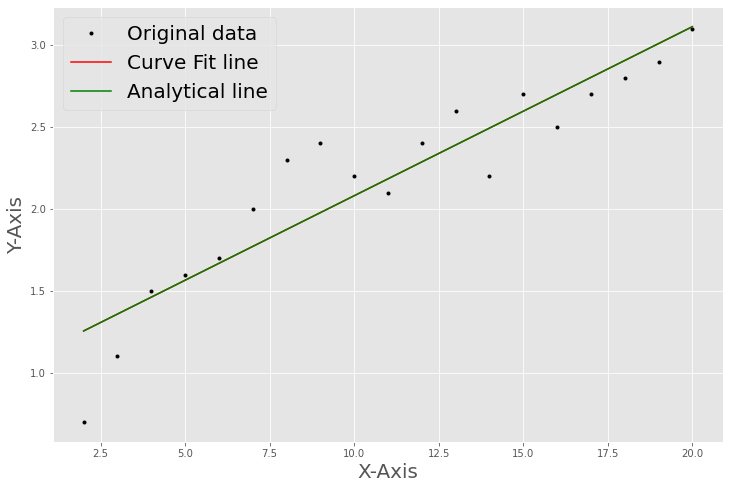

In [26]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots()
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
plt.xlabel('X-Axis', fontsize=20)
plt.ylabel('Y-Axis', fontsize=20)
ax.legend(fontsize=20);

A straight line is a good model for these points because there are an evenly spread amount of points both above and below the line (10 above and 8 below).

***

## References

***

[01][NumPy - numpy.absolute](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html)<br>
[02][GitHub - Ian McLoughlin - 02-models.ipynb](https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb)<br>
[03][math.stackexchange.com - Why does regression use least "squares" instead of least "absolute values"?](https://math.stackexchange.com/questions/3580109/why-does-regression-use-least-squares-instead-of-least-absolute-values)<br>
[04][demonstrations.wolfram.com -Comparing Least-Squares Fit and Least Absolute Deviations Fit](https://demonstrations.wolfram.com/ComparingLeastSquaresFitAndLeastAbsoluteDeviationsFit/)<br>
[05][math.dartmouth - Differentiability](https://math.dartmouth.edu/opencalc2/cole/lecture21.pdf)